In [1]:
!pip install opencv-python

In [45]:
import os
import cv2
import random
import imutils
import numpy as np
from abc import ABC, abstractmethod
from scipy.interpolate import UnivariateSpline

class Strategy(ABC):
    @abstractmethod
    def execute(self, picture: np.array) -> np.array:
        return picture

    pass

class Grayscale(Strategy):

    def execute(self, picture: np.array) -> np.array:
        return cv2.cvtColor(picture, cv2.COLOR_RGB2GRAY)

    pass
class blur(Strategy):

    def execute(self, picture: np.array)-> np.array:
      return cv2.GaussianBlur(picture, (5, 5), 0)

    pass

class Sharpen(Strategy):

    def execute(self, picture: np.array) -> np.array:
        kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
        return cv2.filter2D(src = picture, ddepth = cv2.CV_16U, kernel = kernel)

    pass

class Sepia(Strategy):

    def execute(self, picture: np.array) -> np.array:
        # Converting to float to prevent loss
        picture = np.array(picture, dtype=np.float64)
         # multipying image with special sepia matrix
        picture = cv2.transform(picture, np.matrix([[0.272, 0.534, 0.131],
                                                    [0.349, 0.686, 0.168],
                                                    [0.393, 0.769, 0.189]]))
        # normalizing values greater than 255 to 255
        picture[np.where(picture > 255)] = 255
        picture = np.array(picture, dtype=np.uint8)
        return picture

    pass

class Sketch(Strategy):

    def execute(self, picture: np.array) -> np.array:
        picture, _ = cv2.pencilSketch(picture, sigma_s = 60, sigma_r = 0.07, shade_factor = 0.1)
        return  picture

    pass

class Sketch_Colored(Strategy):

    def execute(self, picture: np.array) -> np.array:
        _, picture = cv2.pencilSketch(picture, sigma_s = 60, sigma_r = 0.07, shade_factor = 0.1)
        return  picture

    pass

class Invert(Strategy):

    def execute(self, picture: np.array) -> np.array:
        return  cv2.bitwise_not(picture)

    pass

def LookupTable(x, y):
    spline = UnivariateSpline(x, y)
    return spline(range(256))

class Summer(Strategy):

    def execute(self, picture: np.array) -> np.array:
        increaseLookupTable = LookupTable([0, 64, 128, 256], [0, 80, 160, 256])
        decreaseLookupTable = LookupTable([0, 64, 128, 256], [0, 50, 100, 256])
        blue_channel, green_channel, red_channel = cv2.split(picture)
        red_channel = cv2.LUT(red_channel, increaseLookupTable).astype(np.uint8)
        blue_channel = cv2.LUT(blue_channel, decreaseLookupTable).astype(np.uint8)
        return cv2.merge((blue_channel, green_channel, red_channel))

    pass

class Winter(Strategy):

    def execute(self, picture: np.array) -> np.array:
        increaseLookupTable = LookupTable([0, 64, 128, 256], [0, 80, 160, 256])
        decreaseLookupTable = LookupTable([0, 64, 128, 256], [0, 50, 100, 256])
        blue_channel, green_channel, red_channel = cv2.split(picture)
        red_channel = cv2.LUT(red_channel, decreaseLookupTable).astype(np.uint8)
        blue_channel = cv2.LUT(blue_channel, increaseLookupTable).astype(np.uint8)
        return cv2.merge((blue_channel, green_channel, red_channel))

    pass

In [46]:
# Importing all necessary libraries
import os
import cv2
import numpy as np


class FilterApplier:

    def __init__(self, strategy: object = None):
        self.setStrategy(Strategy)

    def setStrategy(self, strategy: object) -> None:
        self._strategy = strategy

    # Selects the right strategy based on a string
    def strategySelector(self, filter: str) -> None:
        if filter == "grayscale":
            self.setStrategy(Grayscale())
        elif filter == "blur":
            self.setStrategy(blur())
        elif filter == "sharpen":
            self.setStrategy(Sharpen())
        elif filter == "sepia":
            self.setStrategy(Sepia())
        elif filter == "sketch":
            self.setStrategy(Sketch())
        elif filter == "sketch_colored":
            self.setStrategy(Sketch_Colored())
        elif filter == "invert":
            self.setStrategy(Invert())
        elif filter == "summer":
            self.setStrategy(Summer())
        elif filter == "winter":
            self.setStrategy(Winter())
        else:
            self.setStrategy(None)

    # Apply the filter to the image
    def applyFilter(self, picture: np.array, filter: str) -> np.array:

        self.strategySelector(filter)
        try:
            picture = self._strategy.execute(picture)
        except Exception as e:
            # raise e
            print("The selected option is not unavailable or is written wrong!")

        return picture.copy()

    pass

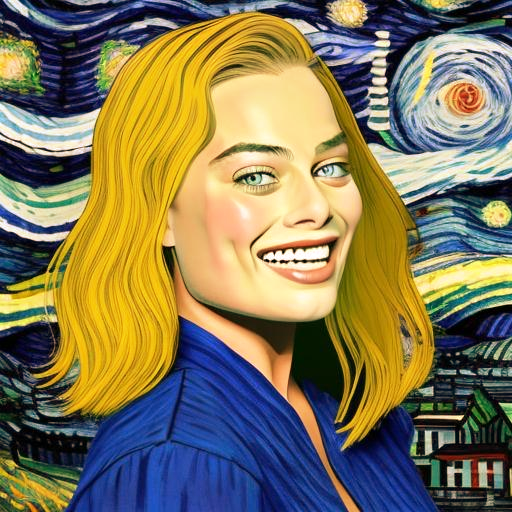

In [51]:
import os
import sys
import cv2
import numpy as np


if __name__ == "__main__":

    # Instanciate filter applier object
    filterApplier =FilterApplier()

    # Collect program params and calls 'applyFilter', writing the result
    picture = cv2.imread('/content/52c92de1-b8fb-46d2-81c2-66f29b585c9f.jpeg')
    filter = "summer"
    picture = filterApplier.applyFilter(picture, filter)
    cv2_imshow( picture)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite(os.path.join('.', 'Image.jpg'), picture)

In [50]:
def filters(path,filter):
  picture = cv2.imread(path)
  picture = filterApplier.applyFilter(picture, filter)
  return picture

array([[[ 83,  51,  40],
        [ 84,  49,  42],
        [ 97,  51,  34],
        ...,
        [120,  54,  20],
        [150,  80,  40],
        [150,  81,  38]],

       [[108,  75,  66],
        [137, 102,  89],
        [146, 101,  87],
        ...,
        [125,  54,  16],
        [152,  80,  40],
        [153,  81,  39]],

       [[131,  99,  97],
        [112,  75,  67],
        [145, 100,  91],
        ...,
        [205, 130,  92],
        [182, 104,  67],
        [156,  79,  40]],

       ...,

       [[ 65,  84,  67],
        [ 63,  85,  66],
        [ 60,  86,  63],
        ...,
        [255, 255, 249],
        [255, 255, 251],
        [213, 204, 200]],

       [[ 35,  58,  43],
        [ 88, 110,  92],
        [ 65,  84,  67],
        ...,
        [240, 231, 222],
        [215, 206, 197],
        [189, 180, 171]],

       [[ 33,  59,  43],
        [ 86, 109,  94],
        [ 66,  84,  67],
        ...,
        [241, 231, 221],
        [241, 231, 221],
        [241, 231, 221]]], dtype=uint8)
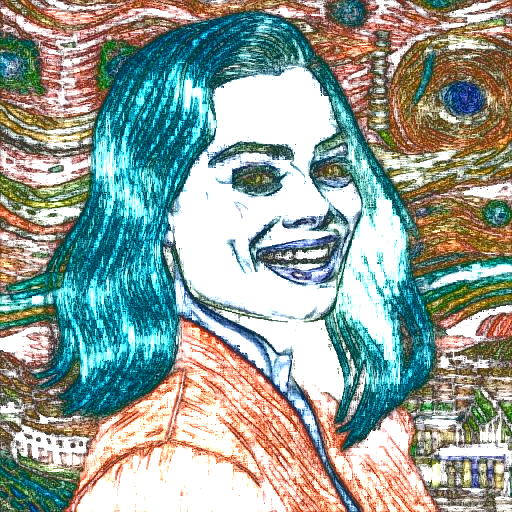

In [53]:
path='/content/52c92de1-b8fb-46d2-81c2-66f29b585c9f.jpeg'
filter='sketch_colored'
filters(path,filter)